# Problem Statement: -

The Entertainment Company, which is a startup online movie watching platform, wants to improvise its collection of movies and showcase those that are highly rated, and recommend those movies to its customer by their movie watching footprints. For this the company has collected its data and shared it with you to provide some analytical insights and also to come up with a Recommendation Algorithm so that it can automate its process for effective recommendations based on Users Interest and behavior patterns. 


# Objective :-
Recommend those movies to its customer by their movie watching footprints.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# import Dataset 
Entertainments = pd.read_csv("D:/360Digi/Entertainment.csv")
Entertainments.shape # shape
Entertainments.columns
Entertainments

,Id,Titles,Category,Reviews
0,6973,Toy Story (1995),"Drama, Romance, School, Supernatural",-8.98
1,6778,Jumanji (1995),"Action, Adventure, Drama, Fantasy, Magic, Mili...",8.88
2,9702,Grumpier Old Men (1995),"Action, Comedy, Historical, Parody, Samurai, S...",99.00
3,6769,Waiting to Exhale (1995),"Sci-Fi, Thriller",99.00
4,1123,Father of the Bride Part II (1995),"Action, Comedy, Historical, Parody, Samurai, S...",-0.44
5,9860,Heat (1995),"Comedy, Drama, School, Shounen, Sports",-6.65
6,1803,Sabrina (1995),"Action, Adventure, Shounen, Super Power",99.00
7,9721,Tom and Huck (1995),"Drama, Military, Sci-Fi, Space",-5.19
8,6563,Sudden Death (1995),"Action, Comedy, Historical, Parody, Samurai, S...",-7.86
9,1323,GoldenEye (1995),"Action, Comedy, Historical, Parody, Samurai, S...",3.01


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

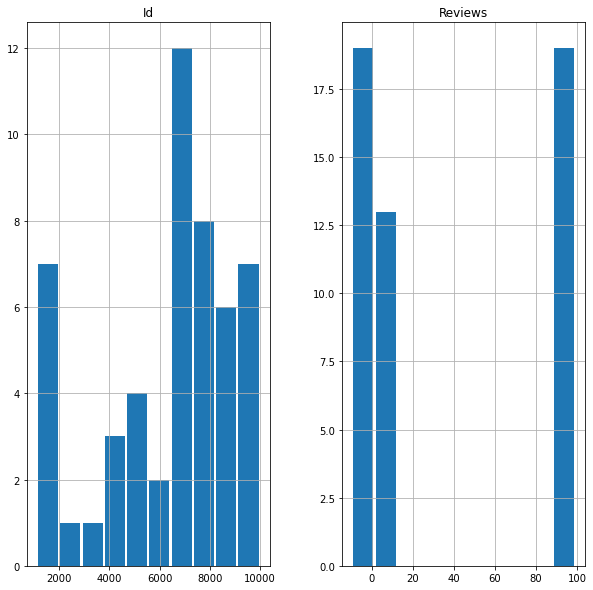

In [3]:
Entertainments.hist(grid=True, rwidth=0.9, figsize=(10,10)) 

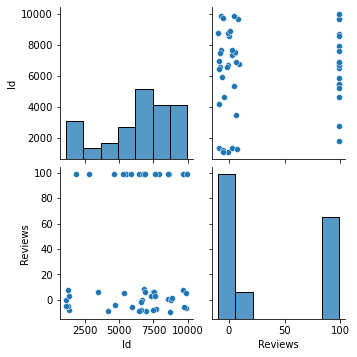

<Figure size 576x576 with 0 Axes>

In [4]:
sns.pairplot(Entertainments)
plt.figure(figsize=(8,8))
plt.show()

<AxesSubplot:>

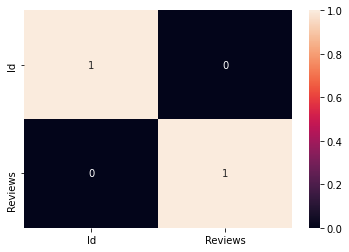

In [5]:
a = Entertainments.corr(method ='pearson')
sns.heatmap(a>0.85,annot=True)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer #term frequencey- inverse document frequncy is a numerical statistic that is intended to reflect how important a word is to document in a collecion or corpus

# Creating a Tfidf Vectorizer to remove all stop words
tfidf = TfidfVectorizer(stop_words = "english")    # taking stop words from tfid vectorizer 

# replacing the NaN values in overview column with empty string
Entertainments["Titles"].isnull().sum() 
Entertainments["Titles"] = Entertainments["Titles"].fillna(" ")

In [21]:

# Preparing the Tfidf matrix by fitting and transforming
tfidf_matrix = tfidf.fit_transform(Entertainments["Titles"])   #Transform a count matrix to a normalized tf or tf-idf representation
tfidf_matrix.shape

(51, 90)

In [25]:
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity on Tfidf matrix
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

# creating a mapping of movie name to index number 
Entertainment_index = pd.Series(Entertainments.index, index = Entertainments["Titles"])
Entertainment_index = Entertainment_index[~Entertainment_index.index.duplicated(keep='first')]

Entertainment_id = Entertainment_index["Othello (1995)"]
Entertainment_id


25

In [28]:

def get_recommendations(Name, topN):    
    # topN = 10
    # Getting the movie index using its title 
    Entertainment_id = Entertainment_index[Name]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[Entertainment_id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores, key=lambda x:x[1], reverse = True)
    
    # Get the scores of top N most similar movies 
    cosine_scores_N = cosine_scores[0: topN+1]
    
    
# Getting the movie index 
    Entertainment_idx  =  [i[0] for i in cosine_scores_N]
    Entertainment_scores =  [i[1] for i in cosine_scores_N]
    
    # Similar movies and scores
    Entertainment_similar_show = pd.DataFrame(columns=["Titles", "Score"])
    Entertainment_similar_show["name"] = Entertainments.loc[Entertainment_idx, "Titles"]
    Entertainment_similar_show["Score"] = Entertainment_scores
    Entertainment_similar_show.reset_index(inplace = True)  
    # anime_similar_show.drop(["index"], axis=1, inplace=True)
    print (Entertainment_similar_show)
    # return (anime_similar_show)


In [29]:

# Enter your anime and number of anime's to be recommended 
get_recommendations("Othello (1995)", topN = 10)
Entertainment_index["Othello (1995)"]


    index Titles     Score                 name
0      25    NaN  1.000000       Othello (1995)
1      26    NaN  0.232828  Now and Then (1995)
2       1    NaN  0.054209       Jumanji (1995)
3       5    NaN  0.054209          Heat (1995)
4       6    NaN  0.054209       Sabrina (1995)
5       9    NaN  0.054209     GoldenEye (1995)
6      12    NaN  0.054209         Balto (1995)
7      13    NaN  0.054209         Nixon (1995)
8      15    NaN  0.054209        Casino (1995)
9      17    NaN  0.054209    Four Rooms (1995)
10     20    NaN  0.054209    Get Shorty (1995)


25

# Summary
1- User based recommentation systems

2- Top 10 recommendation for movies are showed above for Othello (1995).

3- Item based recommentation systems